## dist1

In [16]:
import numpy as np

In [18]:
def mapping_p(obtainpop, pref_point):
    size = len(obtainpop)
    mapping_point = np.array([None]*size, dtype=object)
    fsize = 0
    T = 0.0
    for i in range(0, size):
        t = 0.0
        p = 0.0
        fsize = len(obtainpop[i])
        for j in range(0, fsize):
            t += obtainpop[i][j] * pref_point[j]
            p += pref_point[j] * pref_point[j]
        T = 1 - (t/p)
        f = np.zeros(fsize)
        for j in range(0, fsize):
            f[j] = obtainpop[i][j] + pref_point[j]*T
        mapping_point[i] = f
    return mapping_point

In [20]:
from math import sqrt

In [21]:
def mapping_distance(mapping_point, pref_point):
    sum_ = 0
    distance = 0
    size = len(mapping_point)
    pp_size = len(pref_point)
    for j in range(0, size):
        for i in range(0, pp_size):
            distance += (mapping_point[j][i] - pref_point[i])*(mapping_point[j][i] - pref_point[i])
        sum_ += sqrt(distance)
    return sum_ / distance

## dist_d2

In [23]:
def dist_vector(vec1, vec2):
    dim = len(vec1)
    sum_ = 0
    for i in range(0, dim):
        sum_ += (vec1[i]- vec2[i])**2
    return sqrt(sum_)

In [24]:
def d2_spcing(df):
    size = len(df)
    sum_ = 0
    dist = []
    temp = 0
    for i in range(0, size):
        distance = 1.0e+30
        for j in range(0, size):
            if j != i:
                temp = dist_vector(df[i], df[j])
                if temp < distance:
                    distance = temp
        dist.append(distance)
    average = sum(dist)/len(dist)
    for i in range(0, size):
        temp = average - dist[i]
        sum_ += temp**2
    return sqrt(sum_/(size-1))

## dist_d3

In [36]:
def distan_d3(ref_point, population, r, k, inside_ROI=[], outside_ROI=[]):
    dim = len(population)
    sum1 = 0
    sum2 = 0
    d = 0
    origion = [0]*len(population[0])
    map_point = mapping_p(population, ref_point)
    for i in range(0, dim):
        d = dist_vector(map_point[i], ref_point)
        sum1 = dist_vector(population[i], origion)
        if d <= r:
            sum2 += sqrt(sum1)
            inside_ROI.append(i)
        else:
            sum2 += k*sqrt(sum1)
            outside_ROI.append(i)
    return sum2 / dim

## PMOD

In [37]:
def get_pmod(ref_point, population, r, k):
    mapping_point = mapping_p(population, ref_point)
    d1 = mapping_distance(population, ref_point)
    d2 = d2_spcing(mapping_point)
    d3 = distan_d3(ref_point, population, r, k)
    size = len(population)
    pmod = d1 + d2 + d3
    return pmod

# DATA

In [38]:
from pymoo.factory import get_problem, get_reference_directions, get_visualization
from pymoo.util.plotting import plot

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)

pf = get_problem("dtlz1").pareto_front(ref_dirs)

## dtlz1

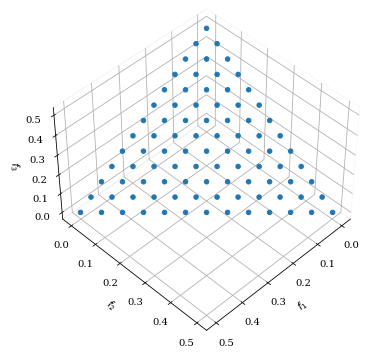

In [39]:
obtainpop1 = get_problem("dtlz1").pareto_front(ref_dirs)
get_visualization("scatter", angle=(45,45)).add(obtainpop1).show()

## dtlz2

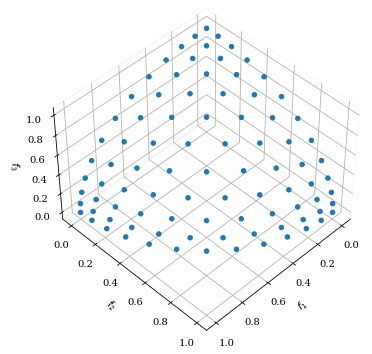

In [40]:
obtainpop2 = get_problem("dtlz2").pareto_front(ref_dirs)
get_visualization("scatter", angle=(45,45)).add(obtainpop2).show()

## dtlz3

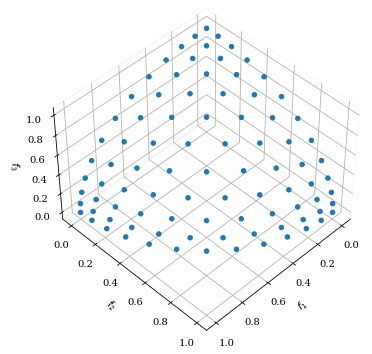

In [41]:
obtainpop3 = get_problem("dtlz3").pareto_front(ref_dirs)
get_visualization("scatter", angle=(45,45)).add(obtainpop3).show()

## test

In [42]:
ref_dirs = get_reference_directions("das-dennis", 5, n_partitions=12)

In [43]:
r = 0.1
k = 1.5
pref_point = np.array([0.1, 0.3, 0.2, 0.4, 0.2])

## dtlz1

In [44]:
obtainpop1 = get_problem("dtlz1").pareto_front(ref_dirs)
get_pmod(pref_point, obtainpop1, r, k)

62.47762692485383

## dtlz2

In [45]:
obtainpop2 = get_problem("dtlz2").pareto_front(ref_dirs)
get_pmod(pref_point, obtainpop2, r, k)

38.53751466110598

## dtlz3

In [46]:
obtainpop3 = get_problem("dtlz3").pareto_front(ref_dirs)
get_pmod(pref_point, obtainpop3, r, k)

38.53751466110598